# Task 1 Hierarchical Clustering

In [5]:
if False:
	%pip install scipy
	%pip install pandas
	%pip install numpy
	%pip install matplotlib
	%pip install scikit-learn


In [6]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


# Task 1 - Dendrogram

## a) Manhatten Distance + average Linkage

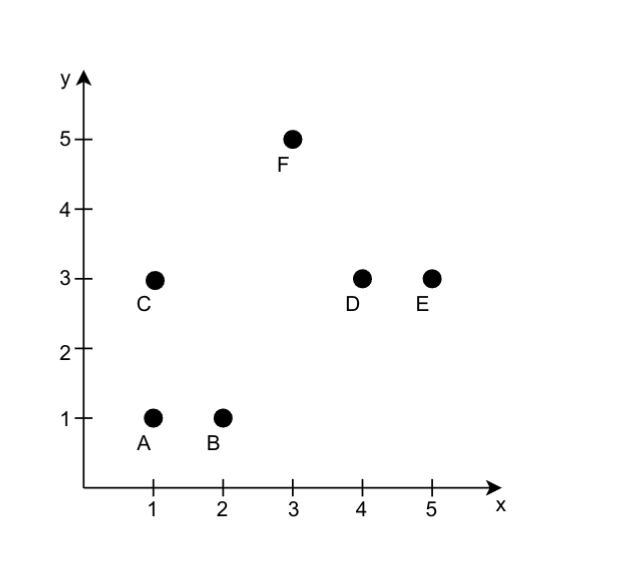

```
You want to cluster the six points seen above. You decide that you want to create
a dendrogram using Manhatten distance and average linkage. How does the resulting
dendrogram look like? Complete the template given above!
```

# Theory

**Manhatten Distance** --> "City Block Distance" --> Distance = xDistance + yDistance \
**Average Linkage** --> every distance between the Points of Cluster A & B

| Point | Coordinates |
| ----- | ----------- |
| A     | (1, 1)      |
| B     | (2, 1)      |
| C     | (1, 3)      |
| D     | (4, 3)      |
| E     | (5, 3)      |
| F     | (3, 5)      |

In [7]:
pointList = [[1, 1, "A"],[2, 1, "B"],[1, 3, "C"],[4, 3, "D"],[5, 3, "E"],[3, 5, "F"]]


### 1. Calculate Distances (manhatten)

In [8]:
def calcManhattenDis(pointA, pointB):
	xCoordA = pointA[0]
	xCoordB = pointB[0]
	yCoordA = pointA[1]
	yCoordB = pointB[1]
	manDistance = abs(xCoordA - xCoordB) + abs(yCoordA - yCoordB)
	return manDistance


In [9]:
def getManDistMatrix(pointList):
	pointCounts = len(pointList)
	manDist = np.zeros((pointCounts, pointCounts))

	for i in range(0, len(pointList)):

		# dont need full matrices just every distance once
		for n in range(i+1, len(pointList)):
			currentDistance = calcManhattenDis(pointList[i], pointList[n])
			manDist[i][n] = currentDistance
			
			# dont need full matrices just every distance once
			#manDist[n][i] = currentDistance

	return manDist


In [10]:
manDisMatrix = getManDistMatrix(pointList)
print(manDisMatrix)


[[0. 1. 2. 5. 6. 6.]
 [0. 0. 3. 4. 5. 5.]
 [0. 0. 0. 3. 4. 4.]
 [0. 0. 0. 0. 1. 3.]
 [0. 0. 0. 0. 0. 4.]
 [0. 0. 0. 0. 0. 0.]]


### 2. Find minimum value

In [11]:
minValue = np.min(manDisMatrix)
print(minValue)


0.0


### 3. Flatten the matrices for easier searching

In [12]:
flattedDisMatrices = manDisMatrix.flatten()
print(flattedDisMatrices)


[0. 1. 2. 5. 6. 6. 0. 0. 3. 4. 5. 5. 0. 0. 0. 3. 4. 4. 0. 0. 0. 0. 1. 3.
 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0.]


### 4. take only uniques and sort them

In [13]:
unique_sorted = np.unique(flattedDisMatrices)
# since we dont want the 0 distances (distance from the points to itself we slice after the first element of the list)
unique_sorted = unique_sorted[1:]

print(f"Distances in the matrix: \t{unique_sorted}")


Distances in the matrix: 	[1. 2. 3. 4. 5. 6.]


### 5. get the concerning points/clusters

For position of the values we can use *np.argwhere( [CONDITION] )*

In [14]:
positions = np.argwhere(manDisMatrix == unique_sorted[1])
print(positions)


[[0 2]]


### 6. combine them ...

## and now loop the fun 

In [15]:
def createBaseClusters(pointList):
	''' 
	need to create baseclusters from the pointList thus we can use the same functions later 
	--> each Point 1D-Array
	--> each Cluster 2D-Array containing the points
	'''
	baseClusters = []
	for i in range(0, len(pointList)):
		baseClusters.append([pointList[i]])

	return baseClusters


In [16]:
def calcClusterDistanceMatrix(clusters):

	#generate clusterDistance matrices
	clusterDistances = np.zeros((len(clusters), len(clusters)))
	
	#calc average linkage
	
	#calc linkage combinations to calculate

	for a in range(0, len(clusters)):
		clusterA = clusters[a]
		for b in range(a+1, len(clusters)):
			clusterB = clusters[b]

			averageDistance = calcAverageLinkage(clusterA, clusterB)
			clusterDistances[a][b] = averageDistance
	#


	return clusterDistances


In [17]:
def calcAverageLinkage(clusterA, clusterB):
	sumOfDistances = 0
	calcs = 0
	
	#calculate the manhatten  distance between every point of cluster A to cluster B
	for a in range(0, len(clusterA)):
		pointA = clusterA[a]
		for b in range(0, len(clusterB)):
			pointB = clusterB[b]

			sumOfDistances += calcManhattenDis(pointA, pointB)
			calcs += 1

	#calc the average
	averageLinkage = sumOfDistances / calcs

	return averageLinkage


In [18]:
def getNewClusters(oldClusters, distanceMatrix):
	newClusters = []
	toDeleteClusters = []
	flattedDisMatrices = distanceMatrix.flatten()
	uniqueSortedMatrices = np.unique(flattedDisMatrices)
	
	# since we dont want the 0 distances (distance from the points to itself we slice after the first element of the list)
	uniqueSortedMatrices = uniqueSortedMatrices[1:]
	print(f"the smallest Distance is: \t{uniqueSortedMatrices[0]}")
	connectionsToMake = np.argwhere(distanceMatrix == uniqueSortedMatrices[0])

	for c in connectionsToMake:
		print(f"creating new Clusters between: \t{c}")


	for i in range(0, connectionsToMake.shape[0]):
		#combine new clusters
		combinedCluster = []

		clusterA = (oldClusters[connectionsToMake[i][0]])
		clusterB = (oldClusters[connectionsToMake[i][1]])

		combinedCluster.extend(clusterA)
		combinedCluster.extend(clusterB)

		toDeleteClusters.append(connectionsToMake[i][0])
		toDeleteClusters.append(connectionsToMake[i][1])

		newClusters.append(combinedCluster)

	#reverse index order to avoid running out of indexes when deleting
	#toDeleteClusters = toDeleteClusters.map(int)
	toDeleteClusters = sorted(toDeleteClusters, reverse=True)
	#delete already used Clusters
	for delCluster in toDeleteClusters:
		del oldClusters[delCluster]
	

	#add untouched clusters to the new ones
	
	newClusters.extend(oldClusters)

	return newClusters
	

In [19]:
def printClusters(clusters):
	for i,cCluster in enumerate(clusters):
		print(f"The {i}. Cluster contains: \t{cCluster}")


In [20]:
#need to transfer the base list into a base cluster list by defining a cluster for each point
baseClusters = createBaseClusters(pointList)

distanceMatrix = calcClusterDistanceMatrix(baseClusters)
print("Distance Matrix: \n", distanceMatrix)

newClusters = getNewClusters(baseClusters, distanceMatrix)
printClusters(newClusters)


Distance Matrix: 
 [[0. 1. 2. 5. 6. 6.]
 [0. 0. 3. 4. 5. 5.]
 [0. 0. 0. 3. 4. 4.]
 [0. 0. 0. 0. 1. 3.]
 [0. 0. 0. 0. 0. 4.]
 [0. 0. 0. 0. 0. 0.]]
the smallest Distance is: 	1.0
creating new Clusters between: 	[0 1]
creating new Clusters between: 	[3 4]
The 0. Cluster contains: 	[[1, 1, 'A'], [2, 1, 'B']]
The 1. Cluster contains: 	[[4, 3, 'D'], [5, 3, 'E']]
The 2. Cluster contains: 	[[1, 3, 'C']]
The 3. Cluster contains: 	[[3, 5, 'F']]


In [21]:
distanceMatrix = calcClusterDistanceMatrix(newClusters)
print("Distance Matrix: \n", distanceMatrix)

newClusters = getNewClusters(newClusters, distanceMatrix)
printClusters(newClusters)


Distance Matrix: 
 [[0.  5.  2.5 5.5]
 [0.  0.  3.5 3.5]
 [0.  0.  0.  4. ]
 [0.  0.  0.  0. ]]
the smallest Distance is: 	2.5
creating new Clusters between: 	[0 2]
The 0. Cluster contains: 	[[1, 1, 'A'], [2, 1, 'B'], [1, 3, 'C']]
The 1. Cluster contains: 	[[4, 3, 'D'], [5, 3, 'E']]
The 2. Cluster contains: 	[[3, 5, 'F']]


In [22]:
distanceMatrix = calcClusterDistanceMatrix(newClusters)
print("Distance Matrix: \n", distanceMatrix)

newClusters = getNewClusters(newClusters, distanceMatrix)
printClusters(newClusters)


Distance Matrix: 
 [[0.  4.5 5. ]
 [0.  0.  3.5]
 [0.  0.  0. ]]
the smallest Distance is: 	3.5
creating new Clusters between: 	[1 2]
The 0. Cluster contains: 	[[4, 3, 'D'], [5, 3, 'E'], [3, 5, 'F']]
The 1. Cluster contains: 	[[1, 1, 'A'], [2, 1, 'B'], [1, 3, 'C']]


In [23]:
distanceMatrix = calcClusterDistanceMatrix(newClusters)
print("Distance Matrix: \n", distanceMatrix)

newClusters = getNewClusters(newClusters, distanceMatrix)
printClusters(newClusters)


Distance Matrix: 
 [[0.         4.66666667]
 [0.         0.        ]]
the smallest Distance is: 	4.666666666666667
creating new Clusters between: 	[0 1]
The 0. Cluster contains: 	[[4, 3, 'D'], [5, 3, 'E'], [3, 5, 'F'], [1, 1, 'A'], [2, 1, 'B'], [1, 3, 'C']]


##  Easy Solution

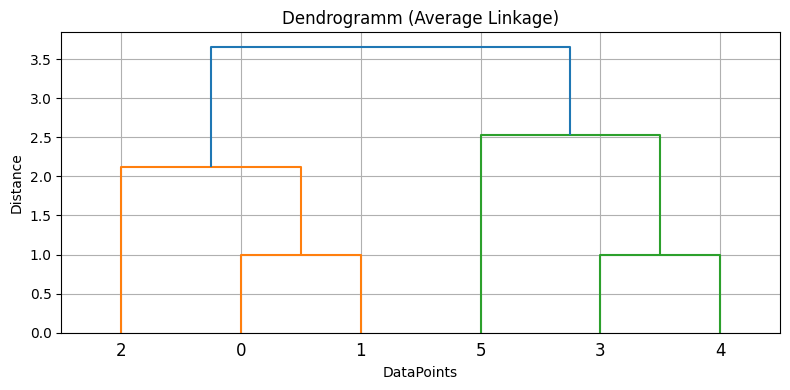

In [24]:
pointList = [[1, 1],[2, 1],[1, 3],[4, 3],[5, 3],[3, 5]]

# calculate average Linkage 
linked = scipy.cluster.hierarchy.linkage(pointList, method='average')

# create dendrogramm graphics
plt.figure(figsize=(8, 4))
scipy.cluster.hierarchy.dendrogram(linked)
plt.title("Dendrogramm (Average Linkage)")
plt.xlabel("DataPoints")
plt.ylabel("Distance")
plt.grid(True)
plt.tight_layout()
plt.show()


### b)

```
You want to cluster the same six points, but using maximum norm and complete linkage.
How does the resulting dendrogram look like? Complete the template below!

```

|||
|-----------------|-----------------------------------------------|
|**maximum norm** 		| --> Distance = Maximum Value from either x- or y-distance|
|**complete Linkage** 	| --> use the furthest points|

In [25]:
def maxDistance(pointA, pointB):
	xDistance = abs(pointA[0] - pointB[0])
	yDistance = abs(pointA[1] - pointB[1])
	maxDist = max(xDistance, yDistance)

	return maxDist


In [26]:
def calcCompleteLinkage(clusterA, clusterB):
	completeDistance = 0
	
	#calculate the manhatten  distance between every point of cluster A to cluster B
	for a in range(0, len(clusterA)):
		pointA = clusterA[a]
		for b in range(0, len(clusterB)):
			pointB = clusterB[b]

			completeDistance = max(completeDistance, maxDistance(pointA, pointB))

	return completeDistance


In [27]:
def calcMaxCompleteDistMat(clusters):

	#generate clusterDistance matrices
	clusterDistances = np.zeros((len(clusters), len(clusters)))
	
	#calc average linkage
	
	#calc linkage combinations to calculate

	for a in range(0, len(clusters)):
		clusterA = clusters[a]
		for b in range(a+1, len(clusters)):
			clusterB = clusters[b]

			completeDistance = calcCompleteLinkage(clusterA, clusterB)
			clusterDistances[a][b] = completeDistance
	#


	return clusterDistances


In [28]:
def getNewClusters(oldClusters, distanceMatrix):
	newClusters = []
	toDeleteClusters = []
	flattedDisMatrices = distanceMatrix.flatten()
	uniqueSortedMatrices = np.unique(flattedDisMatrices)
	
	# since we dont want the 0 distances (distance from the points to itself we slice after the first element of the list)
	uniqueSortedMatrices = uniqueSortedMatrices[1:]
	print(f"the smallest Distance is: \t{uniqueSortedMatrices[0]}")
	connectionsToMake = np.argwhere(distanceMatrix == uniqueSortedMatrices[0])

	for c in connectionsToMake:
		print(f"creating new Clusters between: \t{c}")


	for i in range(0, connectionsToMake.shape[0]):
		#combine new clusters
		combinedCluster = []

		clusterA = (oldClusters[connectionsToMake[i][0]])
		clusterB = (oldClusters[connectionsToMake[i][1]])

		combinedCluster.extend(clusterA)
		combinedCluster.extend(clusterB)

		toDeleteClusters.append(connectionsToMake[i][0])
		toDeleteClusters.append(connectionsToMake[i][1])

		newClusters.append(combinedCluster)

	#reverse index order to avoid running out of indexes when deleting
	#toDeleteClusters = toDeleteClusters.map(int)
	toDeleteClusters = sorted(toDeleteClusters, reverse=True)
	#delete already used Clusters
	for delCluster in toDeleteClusters:
		del oldClusters[delCluster]
	

	#add untouched clusters to the new ones
	
	newClusters.extend(oldClusters)

	return newClusters


In [29]:
pointList = [[1, 1, "A"],[2, 1, "B"],[1, 3, "C"],[4, 3, "D"],[5, 3, "E"],[3, 5, "F"]]

#need to transfer the base list into a base cluster list by defining a cluster for each point
baseClusters = createBaseClusters(pointList)

distanceMatrix = calcMaxCompleteDistMat(baseClusters)
print("Distance Matrix: \n", distanceMatrix)

newClusters = getNewClusters(baseClusters, distanceMatrix)
printClusters(newClusters)


Distance Matrix: 
 [[0. 1. 2. 3. 4. 4.]
 [0. 0. 2. 2. 3. 4.]
 [0. 0. 0. 3. 4. 2.]
 [0. 0. 0. 0. 1. 2.]
 [0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0.]]
the smallest Distance is: 	1.0
creating new Clusters between: 	[0 1]
creating new Clusters between: 	[3 4]
The 0. Cluster contains: 	[[1, 1, 'A'], [2, 1, 'B']]
The 1. Cluster contains: 	[[4, 3, 'D'], [5, 3, 'E']]
The 2. Cluster contains: 	[[1, 3, 'C']]
The 3. Cluster contains: 	[[3, 5, 'F']]


In [30]:
distanceMatrix = calcMaxCompleteDistMat(newClusters)
print("Distance Matrix: \n", distanceMatrix)

newClusters = getNewClusters(newClusters, distanceMatrix)
printClusters(newClusters)


Distance Matrix: 
 [[0. 4. 2. 4.]
 [0. 0. 4. 2.]
 [0. 0. 0. 2.]
 [0. 0. 0. 0.]]
the smallest Distance is: 	2.0
creating new Clusters between: 	[0 2]
creating new Clusters between: 	[1 3]
creating new Clusters between: 	[2 3]


IndexError: list assignment index out of range

## using libraries

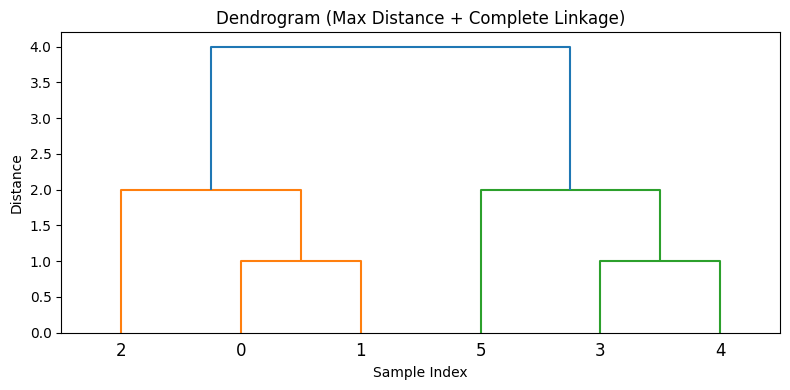

In [31]:
pointList = [[1, 1],[2, 1],[1, 3],[4, 3],[5, 3],[3, 5]]

# Step 1: Compute pairwise distances using maximum norm (Chebyshev)
distance_matrix = scipy.spatial.distance.pdist(pointList, metric='chebyshev')

# Step 2: Perform hierarchical clustering using complete linkage
Z = scipy.cluster.hierarchy.linkage(distance_matrix, method='complete')


# Step 3: Plot the dendrogram
plt.figure(figsize=(8, 4))
scipy.cluster.hierarchy.dendrogram(Z)
plt.title("Dendrogram (Max Distance + Complete Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


# Task 2

|x|y|
|-|-|
|1| 1|
|1| 2|
|2| 2|
|4| 3|
|4| 5|
|5| 4|
|5| 6|
|5| 7|
|6| 4|
|6| 5|
|6| 6|
|6| 7|
|7| 5|
|7| 6|
|7| 8|
|7| 9|
|8| 6|
|10 | 11|
|11 | 10|
|11 | 11|
|12 | 11|

In [32]:
pointList = [[1, 1],[1, 2],[2, 2],[4, 3],[4, 5],[5, 4],[5, 6],[5, 7],[6, 4],[6, 5],[6, 6],[6, 7],[7, 5],[7, 6],[7, 8],[7, 9],[8, 6],[10, 11],[11, 10],[11, 11],[12, 11]]


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

def generateDBSCANplot(data, minPts, eps):
	
	# Convert to numpy array
	X = np.array(data)

	# DBSCAN clustering
	dbscan = DBSCAN(eps, min_samples=minPts)
	labels = dbscan.fit_predict(X)

	# Plotting
	plt.figure(figsize=(8, 6))
	unique_labels = set(labels)

	colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

	for label, col in zip(unique_labels, colors):
		if label == -1:
			# Noise
			col = [0, 0, 0, 1]
			marker = 'x'
		else:
			marker = 'o'

		class_member_mask = (labels == label)
		xy = X[class_member_mask]

		plt.plot(xy[:, 0], xy[:, 1], marker, markerfacecolor=tuple(col),
				markeredgecolor='k', markersize=10, linestyle='')

	plt.title('DBSCAN Clustering')
	plt.xlabel('X')
	plt.ylabel('Y')
	plt.grid(True)
	plt.show()


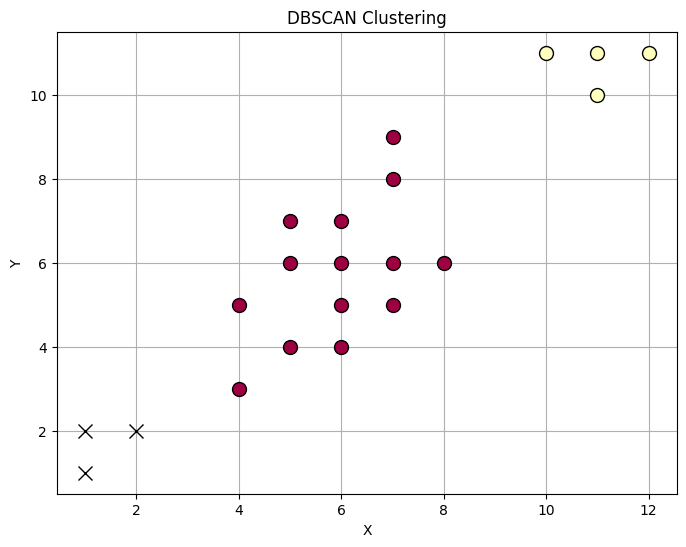

In [34]:
generateDBSCANplot(pointList, 4, 2)



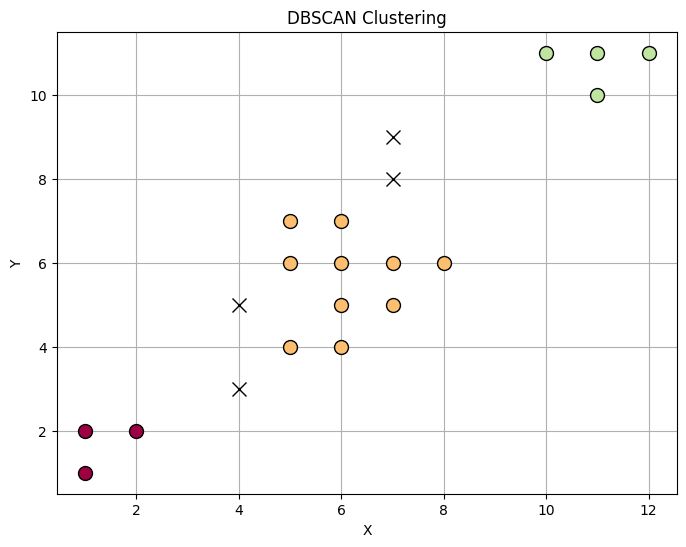

In [35]:
generateDBSCANplot(pointList, 3, 1)


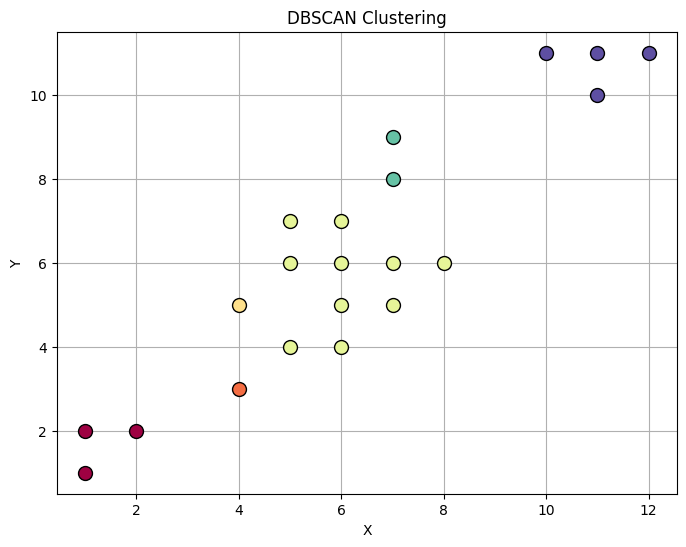

In [36]:
generateDBSCANplot(pointList, 1, 1)


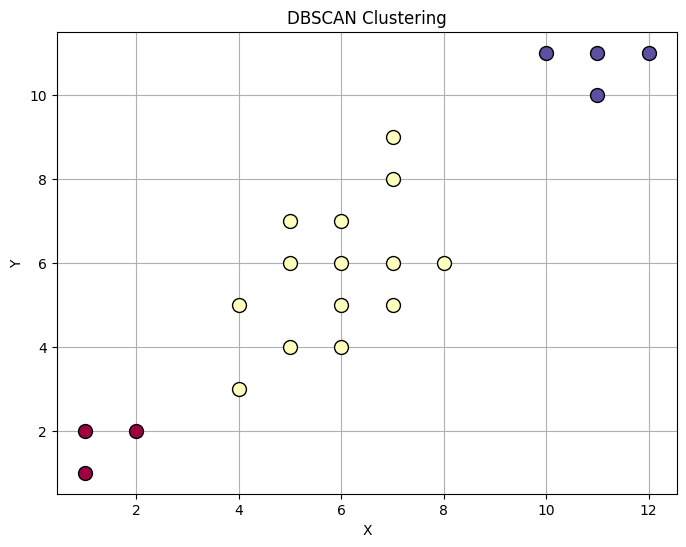

In [37]:
generateDBSCANplot(pointList, 3, 2)
